## Text Generation Model 

Natural language processing (NLP), with a specific focus on text generation. Our primary objective is to design, implement, and analyse a neural network model capable of generating coherent and contextually relevant text sequences. 

- Data Preprocessing: The first phase involves preparing the text data for the neural network. We use a corpus of text, which is then tokenized—converted into numerical values to create a format that a neural network can process. This step is crucial as it transforms raw text into structured sequences, laying the groundwork for the model's training.

- Model Architecture Design: We delve into constructing the model's architecture using TensorFlow and its high-level Keras API. The model comprises Embedding, Bidirectional LSTM (Long Short-Term Memory), and Dense layers. The embedding layer initially transforms the input data into dense vectors of fixed size. The Bidirectional LSTM layer is instrumental in enabling the model to learn from both the past and future context within the data, a vital aspect of understanding language. Lastly, the Dense layers are used for output generation.

- Training the Model: Post-architecture design, the model undergoes training using the preprocessed text data. During this phase, the model learns to predict the next word in a sequence, given the previous words, effectively learning the pattern and structure of the language in the training corpus.

- Text Generation: Upon successful training, the model is then employed to generate new text sequences. This is achieved by providing a seed phrase as input, from which the model predicts subsequent words, iteratively generating a cohesive text sequence. This text generation process is a testament to the model's understanding and learning capabilities.

- Performance Analysis: To evaluate the effectiveness and efficiency of our model, we analyze its performance through various metrics such as loss and accuracy during the training process. We utilize Matplotlib to visualize these metrics, providing insights into the model's learning curve and areas for potential improvement.

### Hemant Thapa

In [1]:
#importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, Attention
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
#creating object tokenizer or model
tokenizer = Tokenizer()

In [4]:
#lyrics by cold play
data = """
When she was just a girl, she expected the world
But it flew away from her reach
So she ran away in her sleep and dreamed of
Para-para-paradise, para-para-paradise, para-para-paradise
Every time she closed her eyes
When she was just a girl, she expected the world
But it flew away from her reach and the bullets catch in her teeth
Life goes on, it gets so heavy
The wheel breaks the butterfly, every tear a waterfall
In the night, the stormy night, she'd close her eyes
In the night, the stormy night, away she'd fly
And dream of para-para-paradise
Para-para-paradise
Para-para-paradise
She'd dream of para-para-paradise
Para-para-paradise
Para-para-paradise
La-la-la-la-la-la-la
La-la-la-la-la-la-la-la-la-la
And so lying underneath those stormy skies
She'd say, "oh
I know the sun must set to rise"
This could be para-para-paradise
Para-para-paradise
This could be para-para-paradise
(Oh-oh-oh-oh-oh, oh-oh-oh)
This could be para-para-paradise
Para-para-paradise
This could be para-para-paradise
(Oh-oh-oh-oh-oh, oh-oh)
This could be para-para-paradise
Para-para-paradise
This could be para-para-paradise
(Oh-oh-oh-oh-oh, oh-oh)

"""

In [5]:
#corpus varibles to convert and store data into lower case plus create sentences 
corpus = data.lower().split("\n")

In [6]:
#total number of sentences 
corpus

['',
 'when she was just a girl, she expected the world',
 'but it flew away from her reach',
 'so she ran away in her sleep and dreamed of',
 'para-para-paradise, para-para-paradise, para-para-paradise',
 'every time she closed her eyes',
 'when she was just a girl, she expected the world',
 'but it flew away from her reach and the bullets catch in her teeth',
 'life goes on, it gets so heavy',
 'the wheel breaks the butterfly, every tear a waterfall',
 "in the night, the stormy night, she'd close her eyes",
 "in the night, the stormy night, away she'd fly",
 'and dream of para-para-paradise',
 'para-para-paradise',
 'para-para-paradise',
 "she'd dream of para-para-paradise",
 'para-para-paradise',
 'para-para-paradise',
 'la-la-la-la-la-la-la',
 'la-la-la-la-la-la-la-la-la-la',
 'and so lying underneath those stormy skies',
 'she\'d say, "oh',
 'i know the sun must set to rise"',
 'this could be para-para-paradise',
 'para-para-paradise',
 'this could be para-para-paradise',
 '(oh-oh

In [7]:
#fitting model
tokenizer.fit_on_texts(corpus)

In [8]:
#counting total words
total_words = len(tokenizer.word_index) + 1

print(f"Total Words: {total_words}")

Total Words: 66


In [9]:
#creating input sequences 
input_sequences = []
#for loop to iterate inside corpus
for line in corpus:
    #token list to store after loop and first index
    token_list = tokenizer.texts_to_sequences([line])[0]
    #nested loop to iterate from range one to length of token list
    for i in range(1, len(token_list)):
        #creating n gram sequences 
        n_gram_sequence = token_list[:i+1]
        #storing values in input_sequences 
        input_sequences.append(n_gram_sequence)

In [10]:
input_sequences[:20]

[[21, 6],
 [21, 6, 22],
 [21, 6, 22, 23],
 [21, 6, 22, 23, 16],
 [21, 6, 22, 23, 16, 24],
 [21, 6, 22, 23, 16, 24, 6],
 [21, 6, 22, 23, 16, 24, 6, 25],
 [21, 6, 22, 23, 16, 24, 6, 25, 5],
 [21, 6, 22, 23, 16, 24, 6, 25, 5, 26],
 [27, 17],
 [27, 17, 28],
 [27, 17, 28, 11],
 [27, 17, 28, 11, 29],
 [27, 17, 28, 11, 29, 7],
 [27, 17, 28, 11, 29, 7, 30],
 [18, 6],
 [18, 6, 34],
 [18, 6, 34, 11],
 [18, 6, 34, 11, 12],
 [18, 6, 34, 11, 12, 7]]

In [11]:
#max length of sequences 
max_sequence_len = max([len(x) for x in input_sequences])

In [12]:
#array of input sequences also applying padding method for equal length
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [13]:
input_sequences[:10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  6, 22],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  6, 22, 23],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  6, 22, 23, 16],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  6, 22, 23, 16, 24],
       [ 0,  0,  0,  0,  0,  0,  0, 21,  6, 22, 23, 16, 24,  6],
       [ 0,  0,  0,  0,  0,  0, 21,  6, 22, 23, 16, 24,  6, 25],
       [ 0,  0,  0,  0,  0, 21,  6, 22, 23, 16, 24,  6, 25,  5],
       [ 0,  0,  0,  0, 21,  6, 22, 23, 16, 24,  6, 25,  5, 26],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 27, 17]])

In [14]:
#feature selection 
xs = input_sequences[:, :-1]

In [15]:
xs[:2]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  6]])

In [16]:
#labels
labels = input_sequences[:, -1]

In [17]:
labels[:5]

array([ 6, 22, 23, 16, 24])

In [18]:
#taget selection
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [19]:
ys[:2]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)

In [20]:
#Sequential model
model = Sequential()
#Embedding layer. This layer turns positive integers (indexes) into dense vectors of fixed size.
#total_words is the size of the vocabulary, and 100 is the dimensionality of the embedding vectors.
model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))

#Bidirectional LSTM layer with 150 units. return_sequences=True is necessary for stacking LSTM layers.
#It makes the layer return the full sequence to the next layer instead of just the output of the last time step.
model.add(Bidirectional(LSTM(150, return_sequences=True)))
#Dropout layer to prevent overfitting by randomly setting input units to 0 at a rate of 20% during training.
model.add(Dropout(0.2))

#Another Bidirectional LSTM layer, this time with 100 units. This layer does not return the full sequence,
#it only returns the output of the last time step.
model.add(Bidirectional(LSTM(100)))

#Dense layer (fully connected layer) with total_words/2 units and ReLU activation function.
#This layer will help the model to learn complex patterns in the data.
model.add(Dense(total_words/2, activation='relu'))
#Dropout layer to prevent overfitting, with a 20% dropout rate.
model.add(Dropout(0.2))

#Output Dense layer with total_words units and a softmax activation function.
#This layer will output the probability distribution of the next word over the vocabulary.
model.add(Dense(total_words, activation='softmax'))

#Optimizer (Adam) with a learning rate of 0.01.
adam = Adam(learning_rate=0.01)
#Compile the model using categorical_crossentropy as the loss function (commonly used for multi-class classification),
#and track accuracy as the performance metric.
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13, 100)           6600      
                                                                 
 bidirectional (Bidirection  (None, 13, 300)           301200    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 300)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               320800    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 33)                6633      
                                                                 
 dropout_1 (Dropout)         (None, 33)                0

In [22]:
num_of_epochs = 5000

In [23]:
history = model.fit(xs, ys, epochs=num_of_epochs, verbose=3)

Epoch 1/5000
Epoch 2/5000
Epoch 3/5000
Epoch 4/5000
Epoch 5/5000
Epoch 6/5000
Epoch 7/5000
Epoch 8/5000
Epoch 9/5000
Epoch 10/5000
Epoch 11/5000
Epoch 12/5000
Epoch 13/5000
Epoch 14/5000
Epoch 15/5000
Epoch 16/5000
Epoch 17/5000
Epoch 18/5000
Epoch 19/5000
Epoch 20/5000
Epoch 21/5000
Epoch 22/5000
Epoch 23/5000
Epoch 24/5000
Epoch 25/5000
Epoch 26/5000
Epoch 27/5000
Epoch 28/5000
Epoch 29/5000
Epoch 30/5000
Epoch 31/5000
Epoch 32/5000
Epoch 33/5000
Epoch 34/5000
Epoch 35/5000
Epoch 36/5000
Epoch 37/5000
Epoch 38/5000
Epoch 39/5000
Epoch 40/5000
Epoch 41/5000
Epoch 42/5000
Epoch 43/5000
Epoch 44/5000
Epoch 45/5000
Epoch 46/5000
Epoch 47/5000
Epoch 48/5000
Epoch 49/5000
Epoch 50/5000
Epoch 51/5000
Epoch 52/5000
Epoch 53/5000
Epoch 54/5000
Epoch 55/5000
Epoch 56/5000
Epoch 57/5000
Epoch 58/5000
Epoch 59/5000
Epoch 60/5000
Epoch 61/5000
Epoch 62/5000
Epoch 63/5000
Epoch 64/5000
Epoch 65/5000
Epoch 66/5000
Epoch 67/5000
Epoch 68/5000
Epoch 69/5000
Epoch 70/5000
Epoch 71/5000
Epoch 72/5000
E

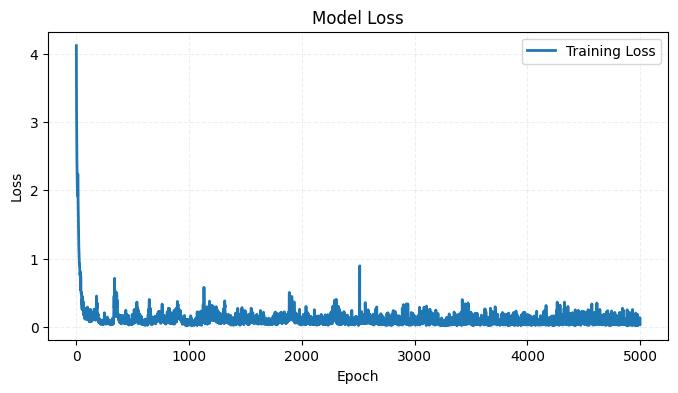

In [24]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss', lw=2)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, ls='--', alpha=0.2)
plt.show()

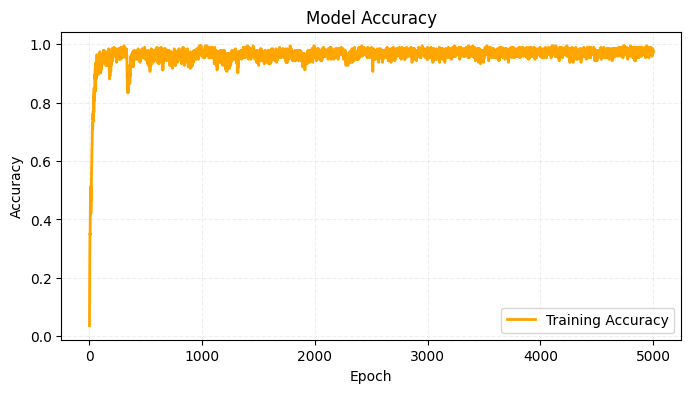

In [25]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='orange', lw=2)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, ls='--', alpha=0.2)
plt.show()

In [26]:
def generate(seed_text, next_word):
    for _ in range(next_word):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted = np.argmax(predicted, axis=-1)  # Get the index of the max probability
        output_word = ""

        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word

    print(seed_text)

In [30]:
seed_text = "When she was just a girl"
next_word = 10

In [31]:
generate(seed_text, next_word)

When she was just a girl she expected the world para para paradise para para paradise


In [32]:
final_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {final_accuracy*100:.2f}%")

Final Training Accuracy: 97.41%


#### TensorFlow:

https://www.tensorflow.org/text

#### Kaggle Dataset:

https://www.kaggle.com/datasets?tags=13204-NLP